In [303]:
medical_charge_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [304]:
from urllib.request import urlretrieve
import sys
sys.executable

'/home/ai/venv-Linear_R/bin/python'

In [305]:
#Downloading dataset
urlretrieve(medical_charge_url, 'medical-charge.csv')

('medical-charge.csv', <http.client.HTTPMessage at 0x773f7290fdd0>)

In [306]:
import numpy as np, pandas as pd, seaborn as sns

In [307]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

#Make sure charts display inside notebook
%matplotlib inline

In [308]:
#OneHotEncoder for categorial data
from sklearn.preprocessing import OneHotEncoder

#Using Linear Regression model for continuous data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Example (Single Feature)
# feature, target = dataFrame[[feature]], dataFrame[target]
# model = Linear Regression().fit(feature ,target)
# predictions = model.predict(feature)

# loss = rmse(target, predictions)
# display loss

In [309]:
medical_charges = pd.read_csv('medical-charge.csv')

In [310]:
medical_charges.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [311]:
medical_charges.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [312]:
medical_charges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [313]:
medical_charges

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [314]:
medical_charges.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [315]:
medical_charges['charges'].corr(medical_charges['age'])

np.float64(0.2990081933306476)

In [316]:
fig = px.histogram(medical_charges,
                   x = 'bmi',
                   marginal='box',
                   title = "BMI")
fig.update_layout(bargap = 0.1)
fig.show()

In [317]:
fig = px.histogram(medical_charges,
                   x = "children",
                   marginal='box',
                   color = "smoker",
                   title = "Childrens")
fig.update_layout(bargap = 0.1)
fig.show()

In [318]:
fig = px.histogram(medical_charges,
                   x = "charges",
                   marginal='box',
                   color = "smoker",
                   title = "Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [319]:
fig = px.histogram(medical_charges,
                   x = "smoker",
                   marginal='box',
                   color = "sex",
                   title = "Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [320]:
fig = px.histogram(medical_charges,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title="Age_hist")
fig.update_layout(bargap = 0.1)
fig.show()

In [321]:
fig = px.scatter(medical_charges,
                 x = 'age',
                 y = 'charges',
                 hover_data = 'sex',
                 opacity=0.8,
                 color = 'smoker',
                 title= 'Age against charges')
fig.show()

In [322]:
fig = px.scatter(medical_charges,
                 x = 'bmi',
                 y = 'charges',
                 hover_data = 'sex',
                 opacity=0.8,
                 color = 'smoker',
                 title= 'Age against charges')
fig.show()

In [323]:
medical_charges.smoker = medical_charges.smoker.map({'yes': 1, 'no': 0})
#smoker = medical_charges.map({'smoker' : {'yes':1, 'no' : 0}})
medical_charges.sex = medical_charges.sex.map({
                "male":1, 
                "female":0})

In [324]:
#Encoding categorial region column as region_northwest, region_southeast, etc.
# ohe = OneHotEncoder(sparse_output = False)
# region_enc = ohe.fit_transform(medical_charges[['region']])

# region_df = pd.DataFrame(region_enc, columns = ohe.get_feature_names_out(None))
# region_df
medical_charges.region = medical_charges.region.map({
                "northeast":0, 
                "northeast":1,
                "northeast":2,
                "northeast":3})

In [325]:
#Variables for frequently used columns
total_target = medical_charges.charges
total_age = medical_charges.age
total_bmi = medical_charges.bmi
total_children = medical_charges.children
total_smoker = medical_charges.smoker
total_sex = medical_charges.sex
total_region = medical_charges.region
# northwest = region_df.region_northwest
# southeast = region_df.region_southeast                            
# southwest = region_df.region_southwest
# northeast = region_df.region_northeast

In [326]:
non_smoker_df = medical_charges[medical_charges.smoker == 0]
target = non_smoker_df.charges
age = non_smoker_df.age
bmi = non_smoker_df.bmi
children = non_smoker_df.children
sex = non_smoker_df.sex
region = non_smoker_df.region

In [327]:
target.corr(age)
#corr_matrix = non_smoker_df.select_dtypes(include="number").corr()

np.float64(0.6279467837664193)

Text(0.5, 1.0, 'Heatmap')

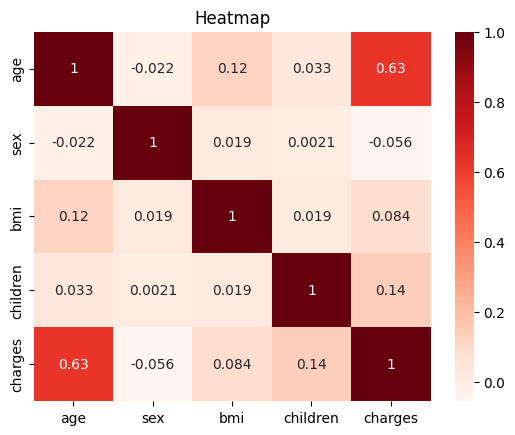

In [328]:
#Heatmaps of only numeric columns
sns.heatmap(non_smoker_df.drop(columns=["smoker", "region"]).corr(),cmap='Reds', annot=True)
plt.title("Heatmap")

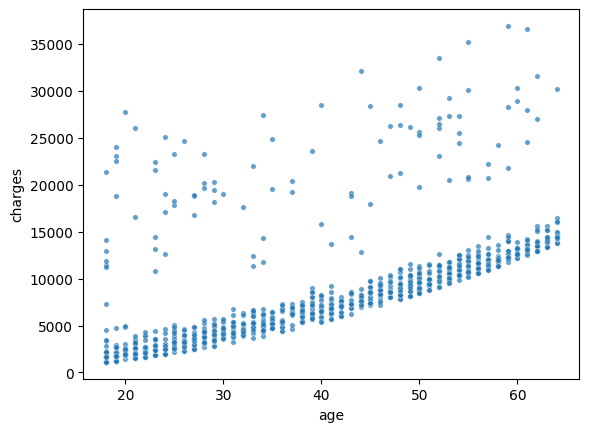

In [329]:
sns.scatterplot(non_smoker_df, x = 'age', y = 'charges', s = 15, alpha = 0.7)
plt.show()


In [330]:
def predict_charges(age, weight, bias):
    return weight * age + bias
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [331]:
w = 250
b = 300
estimate = predict_charges(age, w, b)
estimate

1        4800
2        7300
3        8550
4        8300
5        8050
        ...  
1332    13300
1333    12800
1334     4800
1335     4800
1336     5550
Name: age, Length: 1064, dtype: int64

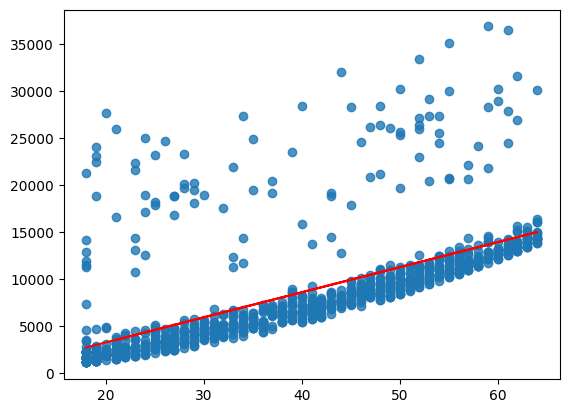

In [332]:
plt.plot(age, prediction, 'r')
plt.scatter(age, target, alpha = 0.8)

In [333]:
def try_prediction(weight, bias):
    prediction = weight * age + bias
    plt.plot(age, prediction, 'r')
    plt.scatter(age, target, alpha = 0.8)

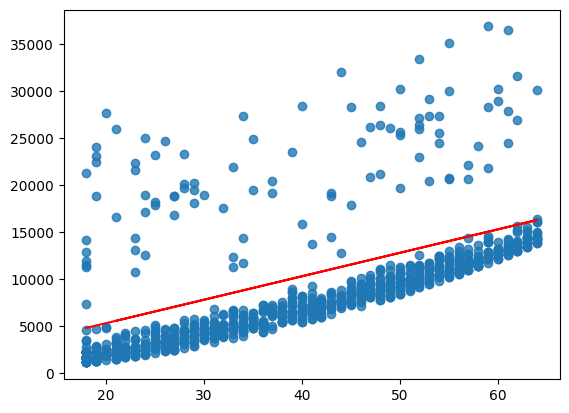

In [334]:
try_prediction(250,300)

In [335]:
#We often track pattern by observing trends however the machine doesn't understand visually
#So we tell the machine how to optimize model in terms of mathematical error
#In Linear Regression, We use MSE(Mean Square Error) for machine learning and RMSE(Root Mean Square Error) for testing or reporting
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target-prediction)))

In [336]:
w = 50
b = 100

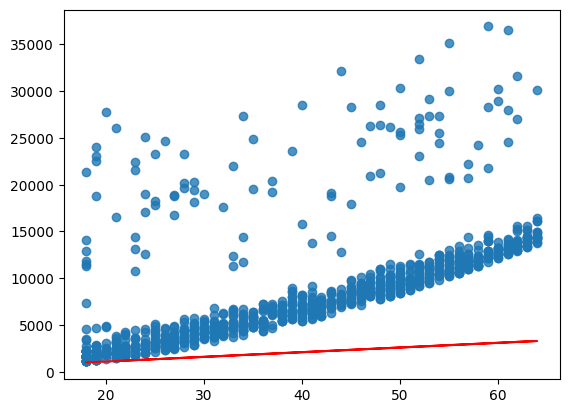

In [337]:
try_prediction(w,b)

In [338]:
prediction = predict_charges(age, w, b)
rmse(target, prediction)

np.float64(8461.949562575493)

In [339]:
def try_prediction(weight, bias):
    prediction = weight * age + bias
    plt.plot(age, prediction, 'r')
    plt.scatter(age, target, alpha = 0.8)
    loss = rmse(target, prediction)
    print("RMSE is: ", loss)

RMSE is:  8461.949562575493


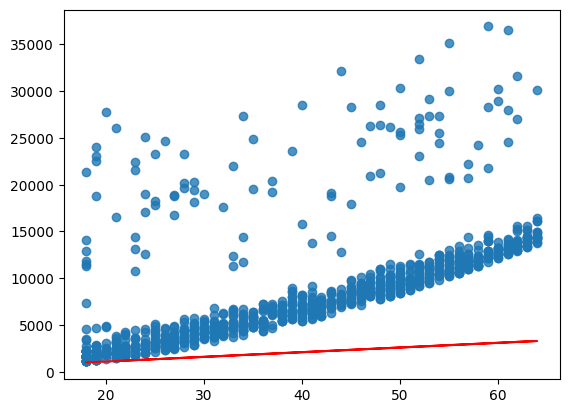

In [340]:
try_prediction(50,100)

RMSE is:  4779.5540037235605


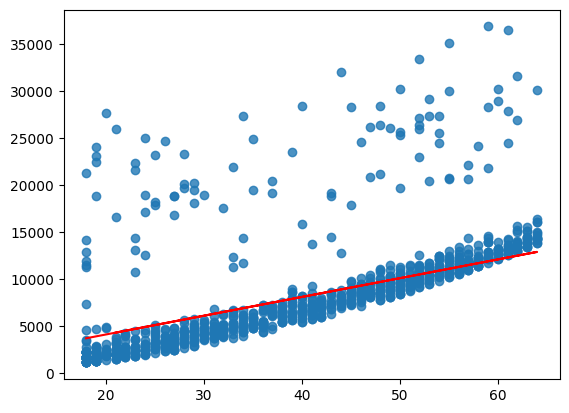

In [341]:
try_prediction(200,100)

RMSE is:  5045.187200319436


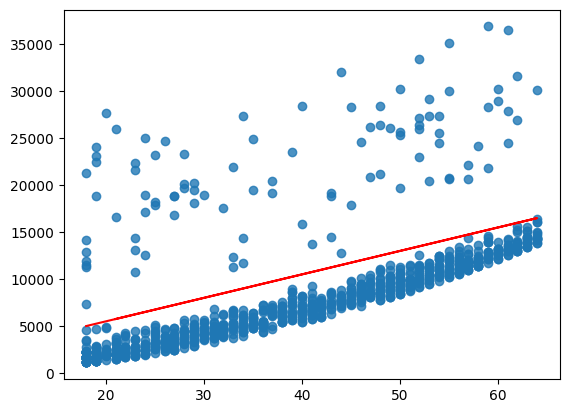

In [342]:
try_prediction(250,500)

RMSE is:  4705.696807404537


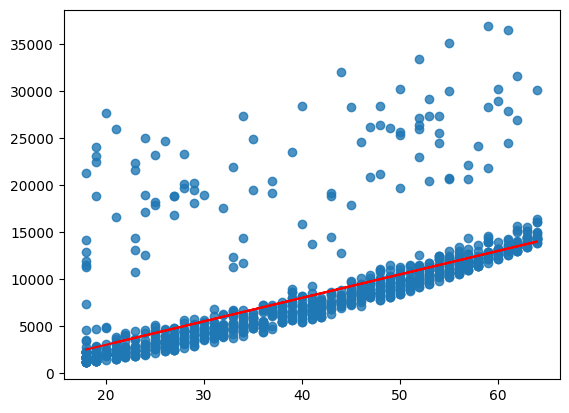

In [343]:
try_prediction(250,-2000)

RMSE is:  4667.658904656397


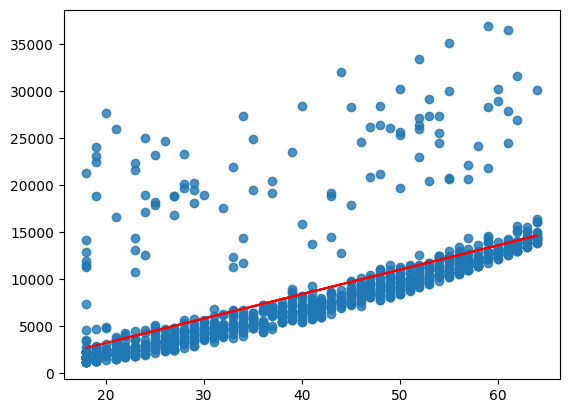

In [344]:
try_prediction(260,-2000)

RMSE is:  4666.944293396931


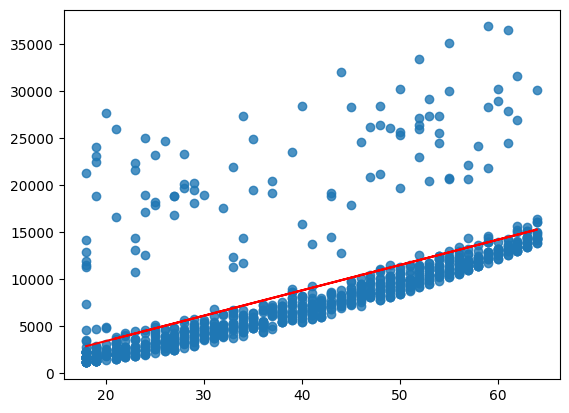

In [345]:
try_prediction(270,-2000)

RMSE is:  4665.3286969735245


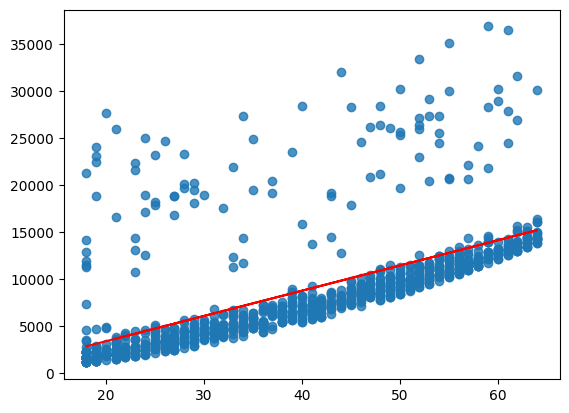

In [346]:
try_prediction(269,-2000)

RMSE is:  4663.221380385796


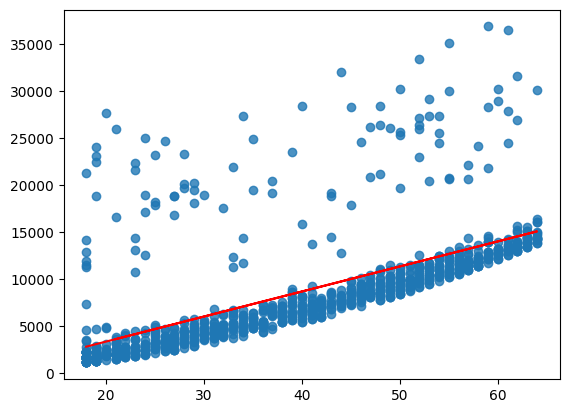

In [347]:
try_prediction(267,-2000)

RMSE is:  4662.614108135884


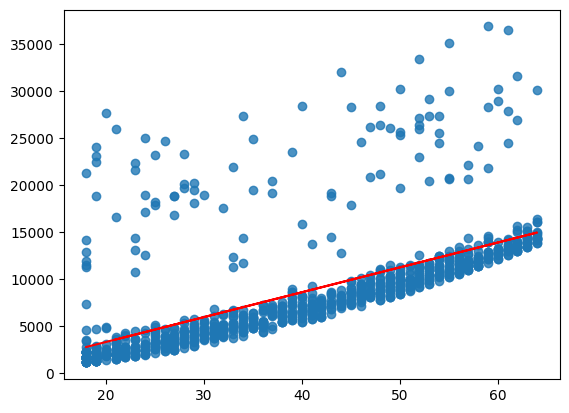

In [348]:
try_prediction(265,-2000)

In [349]:
#Single Feature Linear Regression Machine Learning Model

In [350]:
#We have somewhat found the optimum error by trial and error 
#Around 4662$ of loss for now
#Now let's use the linear regression model from scikit-learn library to train a model
help(model.fit)
#Here, as we can see the x-axis takes input of 2D array (The weight)
#While the y-axis takes input of simple array (The real target)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [351]:
input = non_smoker_df[['age']]
type(input)

pandas.DataFrame

In [352]:
model.fit(input, target)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [353]:
#Now we have successfully fitted data into the regression model
#It's time to use model for prediction
model.predict(np.array([[23],
                       [37],
                       [61]]
                    ))

/home/ai/venv-Linear_R/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [354]:
#Let's check the rmse of the trained model now
prediction = model.predict(input)
rmse(target, prediction)

np.float64(4662.505766636395)

In [355]:
#These are the optimized weight and intercept found by the model
model_w = model.coef_
model_b = model.intercept_

RMSE is:  4662.505766636395


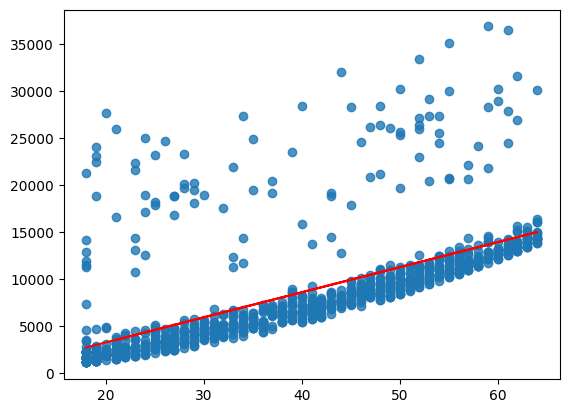

In [356]:
try_prediction(model_w, model_b)

In [357]:
model_w, model_b

(array([267.24891283]), np.float64(-2091.4205565650864))

In [358]:
prediction, target

(array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
        2719.0598744 , 3520.80661289], shape=(1064,)),
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
 5        3756.62160
            ...     
 1332    11411.68500
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 Name: charges, Length: 1064, dtype: float64)

In [359]:
#Here we have successfully trained our first linear regression model for a single feature

In [360]:
#Multiple Feature Linear Regression Machine Learning Model